# Modelling herb runs in Old School Runescape

## 04-Raw data & exploratory data analysis
All of the following data anlaysis will take place using Python in .ipynb (Interactive Python Notebook) format using JupyterLab. Firstly loading all the necessary modules and some base settings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (21.0, 13.0)
sns.set_style('whitegrid')

Then we can import the herb run data recorded in data.csv into a pandas dataframe using read_csv.

In [3]:
df_herb = pd.read_csv('./data.csv')
df_herb

,Farming Guild,Port Phasmatys,Weiss,Catherby,Troll Stronghold,Hosidius,Ardougne,Falador
0,9,7,7,10.0,7,7,8.0,12.0
1,9,8,11,13.0,9,9,8.0,7.0
2,9,8,9,9.0,10,7,13.0,8.0
3,10,6,9,10.0,11,16,NaN,8.0
4,13,7,6,12.0,7,7,9.0,8.0
5,9,9,8,8.0,7,12,9.0,9.0
6,7,10,10,11.0,8,9,11.0,9.0
7,9,6,10,10.0,8,9,12.0,10.0
8,7,6,7,9.0,10,9,NaN,NaN
9,7,8,9,14.0,6,10,8.0,8.0


We can see that there are some NaN (not a number or empty) values in the dataset. These are due to the herb patches dying from disease and thus, did not result in any gathered data on a herb run. It looks as if the columns with NaN values present are stored in a different datatype, we can check this and for the sake of cohesion, convert all columns into the same datatype.

In [4]:
df_herb.dtypes

Farming Guild         int64
Port Phasmatys        int64
Weiss                 int64
Catherby            float64
Troll Stronghold      int64
Hosidius              int64
Ardougne            float64
Falador             float64
dtype: object

In [5]:
df_herb = df_herb.astype('float64')
df_herb.dtypes

Farming Guild       float64
Port Phasmatys      float64
Weiss               float64
Catherby            float64
Troll Stronghold    float64
Hosidius            float64
Ardougne            float64
Falador             float64
dtype: object

Next we can check if all of the minimal values of herbs harvested on each patch are above or equal to 6 which is the base guaranteed number due to using ultracompost

In [6]:
df_herb.min()

Farming Guild       7.0
Port Phasmatys      6.0
Weiss               6.0
Catherby            6.0
Troll Stronghold    6.0
Hosidius            6.0
Ardougne            6.0
Falador             7.0
dtype: float64

We can see that no patch had a minimum value under the specified base number, so we can safely assume that ultracompost was used on all patches. Now we can subtract 6 from each entry to transform the data into the wanted random part, which is the extra number of herbs harvested on each patch. I have chosen to label this as a seperate dataset as we might need to come back to the true collected dataset later.

In [7]:
df_herbRand = df_herb - 6

Which will allow us to get some correct summary statistics on the extra number of herbs harvested at each patch.

In [8]:
round(df_herbRand.describe(),2)

,Farming Guild,Port Phasmatys,Weiss,Catherby,Troll Stronghold,Hosidius,Ardougne,Falador
count,17.00,17.00,17.00,16.00,17.00,17.00,15.00,16.00
mean,3.18,1.76,2.53,4.25,2.94,2.82,2.87,2.81
std,1.78,1.44,1.50,2.44,2.38,2.32,1.92,1.28
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2.00,1.00,2.00,2.75,1.00,1.00,2.00,2.00
50%,3.00,2.00,3.00,4.00,2.00,3.00,2.00,2.50
75%,3.00,3.00,3.00,6.25,4.00,3.00,3.50,3.00
max,7.00,4.00,5.00,8.00,8.00,10.00,7.00,6.00


So we can see that on average the most productive herb patches are the Catherby and Farming Guild patches, whereas the worst patch is the Port Phasmatys patch. However, the Catherby, Troll Stronghold and Hosidius patches have a noticably large amount of variance in comparison to the rest of the patches. We can also consider viewing these summary statisics visually as violin plots (very similar to box and whisker plots) by herb patch.

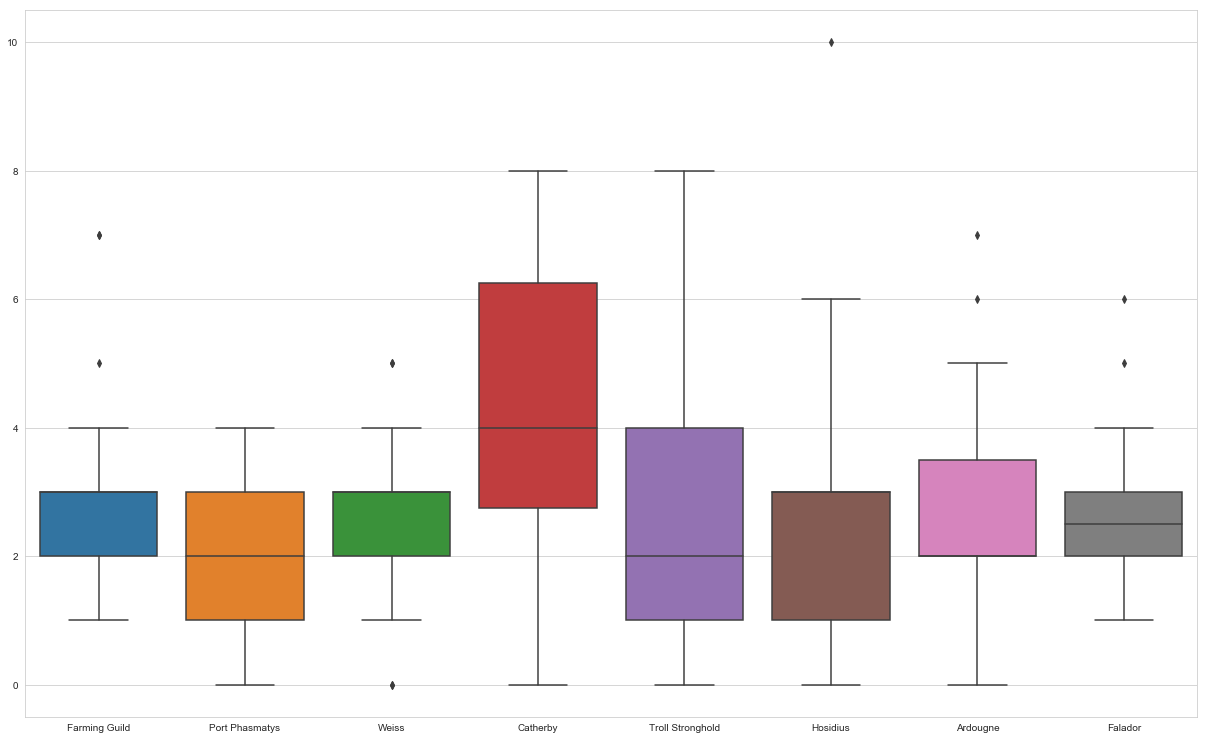

In [10]:
sns.boxplot(data = df_herbRand);